# Naive Bayes

In [9]:
# Import libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

SEED = 42

In [10]:
# Load dataset
df = pd.read_csv('tennis.csv')

print(df)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No


In [11]:
# Preprocessing: Label encoding
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

df

Outlook  Temperature  Humidity  Wind  Play Tennis
0         2            1         0     1            0
1         2            1         0     0            0
2         0            1         0     1            1
3         1            2         0     1            1
4         1            0         1     1            1
5         1            0         1     0            0
6         0            0         1     0            1
7         2            2         0     1            0
8         2            0         1     1            1
9         1            2         1     1            1
10        2            2         1     0            1
11        0            2         0     0            1
12        0            1         1     1            1
13        1            2         0     0            0

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = SEED, max_depth = 3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 1 0]


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cm}')
print(f'Model Accuracy: {accuracy}%')

Confusion Matrix: [[1 0]
 [1 1]]
Model Accuracy: 66.66666666666666%


[Text(0.375, 0.875, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.625, 'X[2] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.375, 'X[3] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

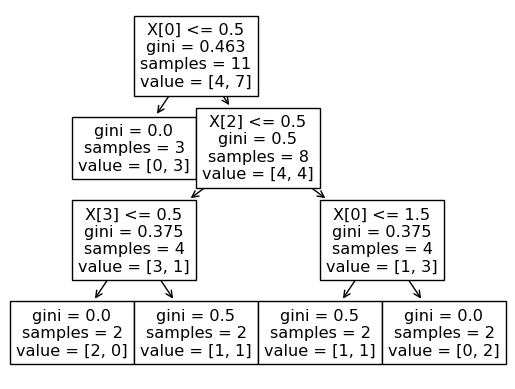

In [18]:
import sklearn.tree as t

t.plot_tree(clf)